# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | muravlenko
Processing Record 3 of Set 1 | fale old settlement
Processing Record 4 of Set 1 | massakory
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | ibipeba
Processing Record 7 of Set 1 | torghay
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | minab
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | manicore
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | mamadysh
Processing Record 17 of Set 1 | chorhat
Processing Record 18 of Set 1 | oyem
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | island harbour
Processing Record 22 of Set 1 | afaahiti
Processing R

Processing Record 40 of Set 4 | daru
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | lazaro cardenas
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | garanhuns
Processing Record 46 of Set 4 | vadso
Processing Record 47 of Set 4 | vitoria da conquista
Processing Record 48 of Set 4 | san antonio de pale
Processing Record 49 of Set 4 | ola
Processing Record 0 of Set 5 | laguna
Processing Record 1 of Set 5 | remire-montjoly
Processing Record 2 of Set 5 | mahibadhoo
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | zanjan
Processing Record 6 of Set 5 | kismayo
Processing Record 7 of Set 5 | camana
Processing Record 8 of Set 5 | fort bragg
Processing Record 9 of Set 5 | tazovsky
Processing Record 10 of Set 5 | yugorsk
Processing Record 11 of Set 5 | thunder bay
Processing Record 12 of Set 5 | mount pearl
Processing Record 13 of Set 5 | at

Processing Record 32 of Set 8 | takamaka
City not found. Skipping...
Processing Record 33 of Set 8 | vorgashor
Processing Record 34 of Set 8 | tripoli
Processing Record 35 of Set 8 | barabai
Processing Record 36 of Set 8 | northam
Processing Record 37 of Set 8 | juneau
Processing Record 38 of Set 8 | quellon
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | cangzhou
Processing Record 41 of Set 8 | hermanus
Processing Record 42 of Set 8 | rurrenabaque
Processing Record 43 of Set 8 | al bawiti
Processing Record 44 of Set 8 | pingdu
Processing Record 45 of Set 8 | midvagur
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | papao
Processing Record 48 of Set 8 | taroa
Processing Record 49 of Set 8 | hammerfest
Processing Record 0 of Set 9 | nagqu
Processing Record 1 of Set 9 | galveston
Processing Record 2 of Set 9 | i-n-salah
Processing Record 3 of Set 9 | shizunai-furukawacho
Processing Record 4 of Set 9 | trinidad
Processing Record 5 of Set 9 | ko

Processing Record 19 of Set 12 | la gi
Processing Record 20 of Set 12 | machakos
Processing Record 21 of Set 12 | gaoyou
Processing Record 22 of Set 12 | lapua
Processing Record 23 of Set 12 | pisco
Processing Record 24 of Set 12 | aydintepe
Processing Record 25 of Set 12 | shaowu
Processing Record 26 of Set 12 | nasiriyah
Processing Record 27 of Set 12 | egersund
Processing Record 28 of Set 12 | kabalo
Processing Record 29 of Set 12 | kirensk
Processing Record 30 of Set 12 | yushu
Processing Record 31 of Set 12 | taro
Processing Record 32 of Set 12 | macas
Processing Record 33 of Set 12 | ulladulla
Processing Record 34 of Set 12 | bonny
Processing Record 35 of Set 12 | benavente
Processing Record 36 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 37 of Set 12 | at taraf
Processing Record 38 of Set 12 | alesund
Processing Record 39 of Set 12 | dolores
Processing Record 40 of Set 12 | malvan
Processing Record 41 of Set 12 | ternate
Processing Record 42 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,285.34,76,91,2.34,AU,1691703232
1,muravlenko,63.7898,74.5230,281.35,78,82,9.56,RU,1691703232
2,fale old settlement,-9.3852,-171.2468,300.75,78,92,5.35,TK,1691703232
3,massakory,12.9960,15.7293,299.72,76,68,2.70,TD,1691703233
4,luderitz,-26.6481,15.1594,292.68,55,14,0.16,NA,1691702882


In [6]:
#Max temps came back in Kelvin. Converting to Celsius
max_temp = city_data_df['Max Temp'] - 273.15
city_data_df['Max Temp'] = max_temp
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,12.19,76,91,2.34,AU,1691703232
1,muravlenko,63.7898,74.5230,8.20,78,82,9.56,RU,1691703232
2,fale old settlement,-9.3852,-171.2468,27.60,78,92,5.35,TK,1691703232
3,massakory,12.9960,15.7293,26.57,76,68,2.70,TD,1691703233
4,luderitz,-26.6481,15.1594,19.53,55,14,0.16,NA,1691702882


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,12.19,76,91,2.34,AU,1691703232
1,muravlenko,63.7898,74.5230,8.20,78,82,9.56,RU,1691703232
2,fale old settlement,-9.3852,-171.2468,27.60,78,92,5.35,TK,1691703232
3,massakory,12.9960,15.7293,26.57,76,68,2.70,TD,1691703233
4,luderitz,-26.6481,15.1594,19.53,55,14,0.16,NaN,1691702882


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

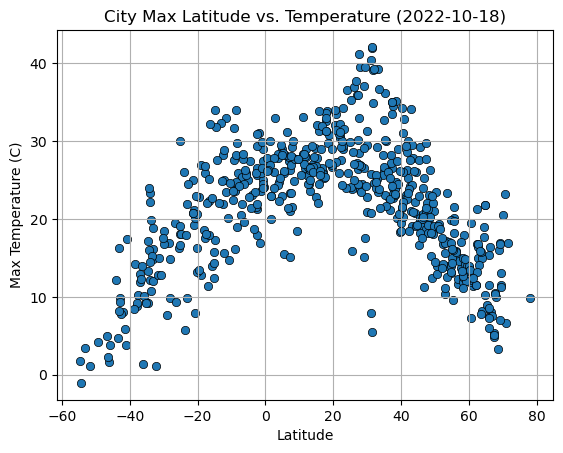

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.scatter(latitude,temperature,edgecolors='black',linewidths=0.5)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

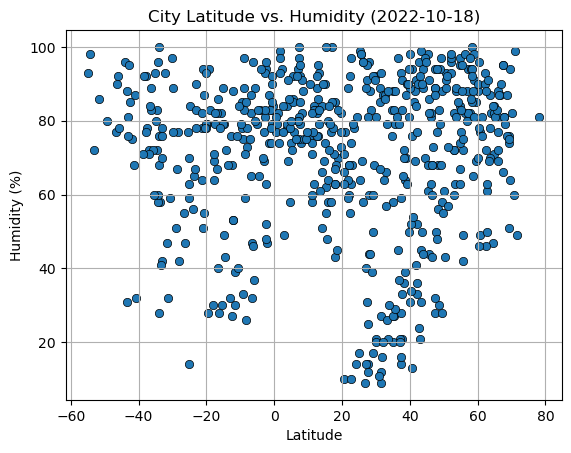

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude,humidity,edgecolors='black',linewidths=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

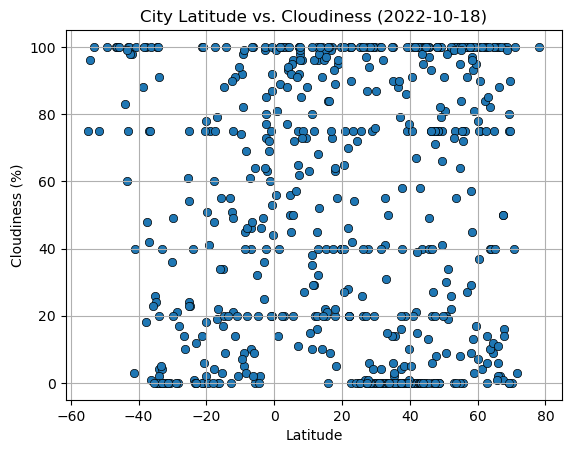

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude,cloudiness,edgecolors='black',linewidths=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

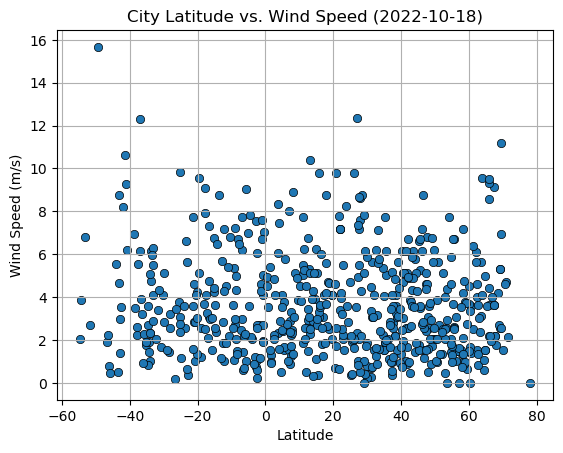

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude,wind_speed,edgecolors='black',linewidths=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
def lin_regress(x_data, y_data, x_label, y_label, text_pos1, text_pos2):
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regression_line = [slope * x + intercept for x in x_data]
    
    print(f'The r-value is: {r_value}')
    plt.scatter(x_data, y_data)
    plt.plot(x_data, regression_line, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_pos1, text_pos2, equation, transform=plt.gca().transAxes, fontsize=16, color='red')

    plt.show()

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,muravlenko,63.7898,74.5230,8.20,78,82,9.56,RU,1691703232
3,massakory,12.9960,15.7293,26.57,76,68,2.70,TD,1691703233
6,torghay,49.6339,63.4981,21.06,58,41,6.22,KZ,1691703233
7,salalah,17.0151,54.0924,26.05,100,100,3.09,OM,1691702898
8,ribeira grande,38.5167,-28.7000,24.22,64,20,3.60,PT,1691702894


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,12.19,76,91,2.34,AU,1691703232
2,fale old settlement,-9.3852,-171.2468,27.60,78,92,5.35,TK,1691703232
4,luderitz,-26.6481,15.1594,19.53,55,14,0.16,NaN,1691702882
5,ibipeba,-11.6408,-42.0111,23.41,39,14,4.50,BR,1691703233
13,manicore,-5.8092,-61.3003,25.97,89,0,1.03,BR,1691703235


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6691323907903162


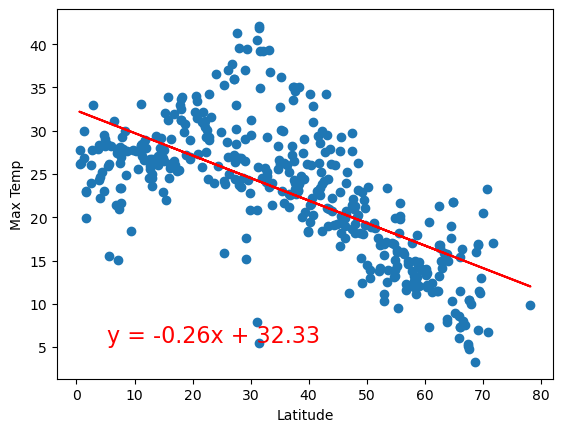

In [77]:
# Linear regression on Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_temps = northern_hemi_df['Max Temp']

lin_regress(north_lats, north_temps,'Latitude','Max Temp', 0.1, 0.1)

The r-value is: 0.7786992934956276


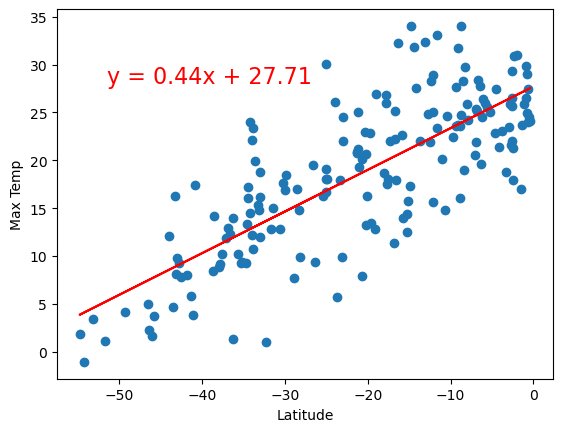

In [79]:
# Linear regression on Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_temps = southern_hemi_df['Max Temp']

lin_regress(south_lats, south_temps,'Latitude','Max Temp', 0.1, 0.8)

**Discussion about the linear relationship:** As the latitude approaches 0, the max temperature gets higher

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.029045152860564652


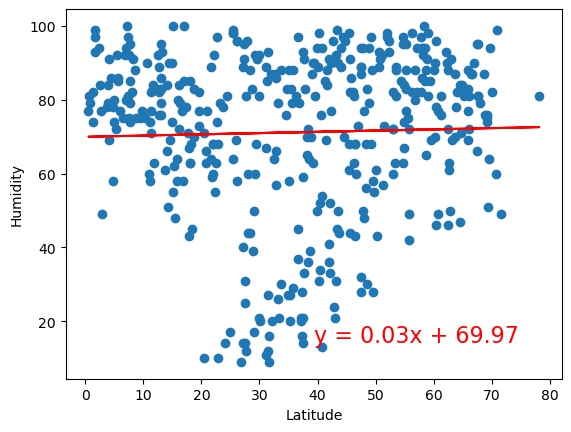

In [83]:
# Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_humidity = northern_hemi_df['Humidity']

lin_regress(north_lats, north_humidity,'Latitude','Humidity', 0.5, 0.1)

The r-value is: -0.0774623905759121


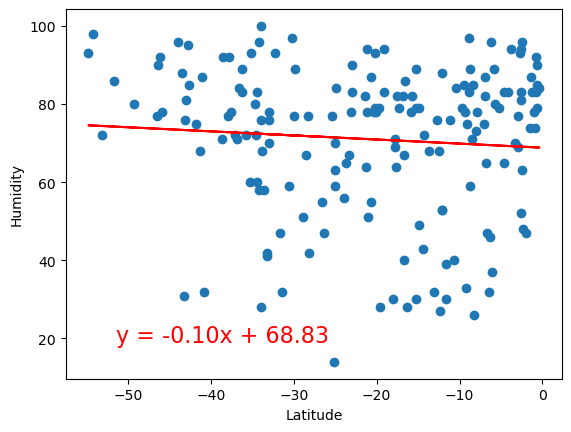

In [85]:
# Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_humidity = southern_hemi_df['Humidity']

lin_regress(south_lats, south_humidity,'Latitude','Humidity', 0.1, 0.1)

**Discussion about the linear relationship:** The latitude does not appear to have much significant effect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.060407895333903686


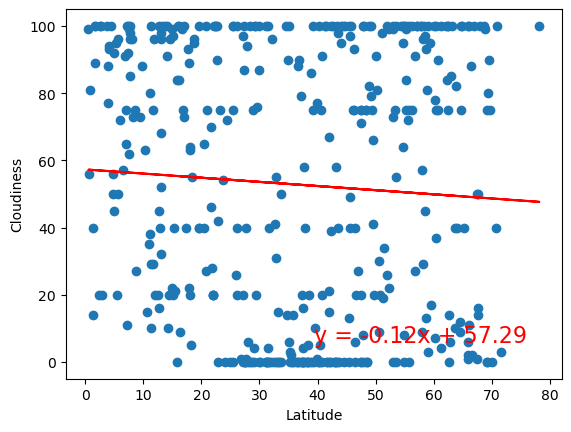

In [86]:
# Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_cloudiness = northern_hemi_df['Cloudiness']

lin_regress(north_lats, north_cloudiness,'Latitude','Cloudiness', 0.5, 0.1)

The r-value is: -0.08569249918518171


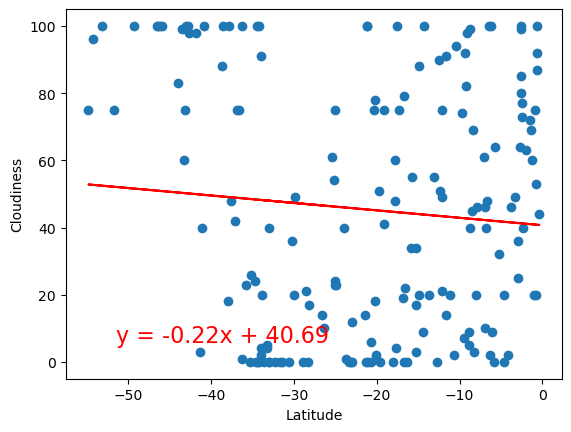

In [87]:
# Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_cloudiness = southern_hemi_df['Cloudiness']

lin_regress(south_lats, south_cloudiness,'Latitude','Cloudiness', 0.1, 0.1)

**Discussion about the linear relationship:** I am unsure of why there are dense groupings at cloudiness levels 0 and 100 as they appear to be present at all latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0425017825857331


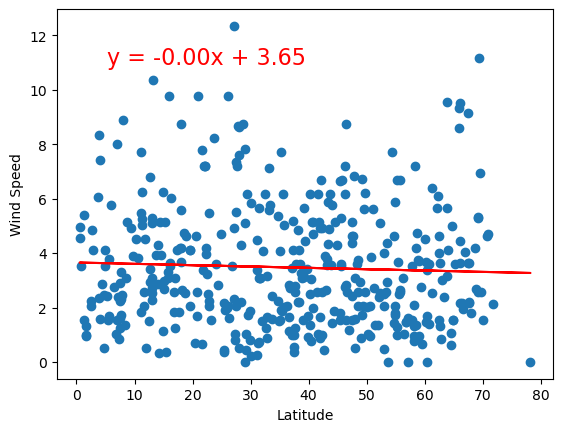

In [93]:
# Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_wind_speed = northern_hemi_df['Wind Speed']

lin_regress(north_lats, north_wind_speed,'Latitude','Wind Speed', 0.1, 0.85)

The r-value is: -0.09102681501198688


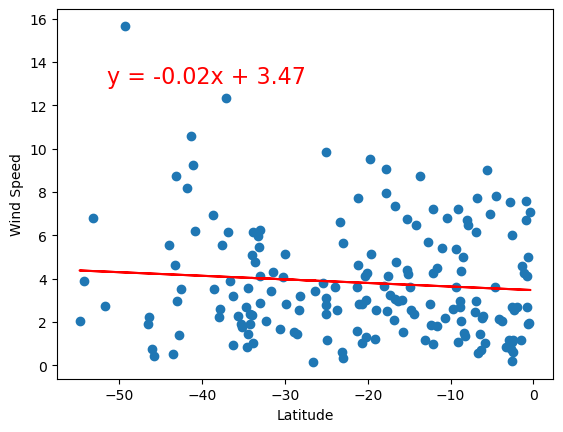

In [94]:
# Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_wind_speed = southern_hemi_df['Wind Speed']

lin_regress(south_lats, south_wind_speed,'Latitude','Wind Speed', 0.1, 0.8)

**Discussion about the linear relationship:** Latitude doesn't appear to have a major impact on wind speed although there are a few outliers around latitudes 30, 70, and -50